# **Abstract:**
This dataset about hair loss prediction is based on some features. The hair loss prediction dataset contains various features related to a person's health and lifestyle, such as stress level, coffee consumption, hair grease usage, etc. These features can be used to predict the likelihood of a person experiencing hair loss, which can help doctors and hair specialists diagnose and treat their patients more effectively. The dataset is a valuable resource for researchers and practitioners in the field of hair loss treatment and prevention.



# **Data Set**
The data set consists of :

1] 12 physical characteristics of hair loss i.e.

1. stay_up_late
2. pressure_level
3. coffee_consumed
4. brain_working_duration
5. school_assesssment
6. stress_level
7. shampoo_brand
8. swimming
9. hair_washing
10. hair_grease
11. dandruff
12. libido

2] hair_loss - The dependent variable

3] There are a total of 401 observations.

# **Aim:**
In this assignment we aim to interpret the results of

1. Linear Model
2. Tree Based Model
3. Best model of AutoML H2O
4. Using different Model Interpretibility Methods.

In this excercise I have used

1. SHAP analysis
2. LIME analysis

In [103]:
#importing all necessary libraries
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Linking the Dataset to the collab**

In [19]:
!pip install -q kaggle

In [20]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"poornachandrakongara","key":"7a14e14f1b88ab76b5d1911df8624c81"}'}

In [21]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d poornachandrakongara/hair-loss-dataset
!unzip /content/hair-loss-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25            960         35  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            695         23  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10            951         32  1.0              
datascientistanna/customers-dataset     

# **Importing and loading of data**

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# load data
url = "/content/hair_loss_dataset.csv"
dataFrame = pd.read_csv(url)


In [23]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hair_loss               400 non-null    object 
 1   stay_up_late            400 non-null    int64  
 2   pressure_level          400 non-null    object 
 3   coffee_consumed         400 non-null    int64  
 4   brain_working_duration  400 non-null    int64  
 5   school_assesssment      400 non-null    object 
 6   stress_level            400 non-null    object 
 7   shampoo_brand           400 non-null    object 
 8   swimming                400 non-null    object 
 9   hair_washing            400 non-null    object 
 10  hair_grease             396 non-null    float64
 11  dandruff                400 non-null    object 
 12  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 40.8+ KB


In [104]:
#There are 2 types : Numerical and Categorical
#Numerical - stay_up_late, coffee_consumed, brain_working_duration, hair_grease,libido
#Categorical- pressure_level, school_assesssment, stress_level, shampoo_brand, swimming, hair_washing, dandruff

In [24]:
dataFrame.head()

hair_loss  stay_up_late pressure_level  coffee_consumed  \
0       Few             2            Low                0   
1       Few             0            Low                0   
2    Medium             3            Low                1   
3       Few             2            Low                0   
4       Few             2            Low                0   

   brain_working_duration school_assesssment stress_level shampoo_brand  \
0                       1               None          Low       Pantene   
1                       3               None          Low       Pantene   
2                       0               None          Low       Pantene   
3                       1               None          Low       Pantene   
4                       1               None          Low       Pantene   

  swimming hair_washing  hair_grease dandruff  libido  
0       No            Y          3.0     None       1  
1       No            N          1.0     None       1  
2      Yes            Y          2.0     None       2  
3       No            N          3.0     None       3  
4       No            Y          1.0     None       2

# **Check for missing values**

In [25]:
dataFrame.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

**Data is missing from the column hair_grease column, which means it is  required to impute or remove the null values from the data**
# **Mean Imputation**

In [26]:
imputed_data = dataFrame.fillna(dataFrame.mean())
imputed_data.head(100)

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


hair_loss  stay_up_late pressure_level  coffee_consumed  \
0        Few             2            Low                0   
1        Few             0            Low                0   
2     Medium             3            Low                1   
3        Few             2            Low                0   
4        Few             2            Low                0   
..       ...           ...            ...              ...   
95    Medium             2         Medium                0   
96    Medium             3           High                3   
97    Medium             2           High                4   
98      Many             2           High                4   
99      Many             4           High                4   

    brain_working_duration school_assesssment stress_level    shampoo_brand  \
0                        1               None          Low          Pantene   
1                        3               None          Low          Pantene   
2                        0               None          Low          Pantene   
3                        1               None          Low          Pantene   
4                        1               None          Low          Pantene   
..                     ...                ...          ...              ...   
95                       3               None       Medium  Hair & Shoulder   
96                       7           Team ass         High  Hair & Shoulder   
97                       7           Team ass         High  Hair & Shoulder   
98                       7           Team ass         High  Hair & Shoulder   
99                       8           Team ass         High  Hair & Shoulder   

   swimming hair_washing  hair_grease dandruff  libido  
0        No            Y          3.0     None       1  
1        No            N          1.0     None       1  
2       Yes            Y          2.0     None       2  
3        No            N          3.0     None       3  
4        No            Y          1.0     None       2  
..      ...          ...          ...      ...     ...  
95       No            Y          3.0     None       5  
96       No            N          4.0      Few       0  
97       No            Y          4.0      Few       0  
98       No            N          4.0      Few       0  
99       No            Y          4.0      Few       5  

[100 rows x 13 columns]

# **Removed Missing values**

In [27]:
imputed_data.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               0
dandruff                  0
libido                    0
dtype: int64

In [28]:
#Replaced categorical value with numerical values as it will be easier to make assumptions

imputed_data['dandruff'].replace('None',0,inplace=True)
imputed_data['dandruff'].replace('Few',1,inplace=True)
imputed_data['dandruff'].replace('Many',2, inplace=True)

imputed_data['hair_loss'].replace("Few", 0, inplace=True)
imputed_data['hair_loss'].replace("Medium", 2, inplace=True)
imputed_data['hair_loss'].replace("Many", 2, inplace=True)
imputed_data['hair_loss'].replace("A lot", 3, inplace=True)

imputed_data['swimming'].replace('Yes', 1, inplace=True)
imputed_data['swimming'].replace('No', 0, inplace=True)

imputed_data.replace('Low', 0, inplace=True)
imputed_data.replace('Medium', 1, inplace=True)
imputed_data.replace('High', 2, inplace=True)
imputed_data.replace('Very High', 3, inplace=True)

imputed_data.head(100)

hair_loss  stay_up_late  pressure_level  coffee_consumed  \
0           0             2               0                0   
1           0             0               0                0   
2           2             3               0                1   
3           0             2               0                0   
4           0             2               0                0   
..        ...           ...             ...              ...   
95          2             2               1                0   
96          2             3               2                3   
97          2             2               2                4   
98          2             2               2                4   
99          2             4               2                4   

    brain_working_duration school_assesssment  stress_level    shampoo_brand  \
0                        1               None             0          Pantene   
1                        3               None             0          Pantene   
2                        0               None             0          Pantene   
3                        1               None             0          Pantene   
4                        1               None             0          Pantene   
..                     ...                ...           ...              ...   
95                       3               None             1  Hair & Shoulder   
96                       7           Team ass             2  Hair & Shoulder   
97                       7           Team ass             2  Hair & Shoulder   
98                       7           Team ass             2  Hair & Shoulder   
99                       8           Team ass             2  Hair & Shoulder   

    swimming hair_washing  hair_grease  dandruff  libido  
0          0            Y          3.0         0       1  
1          0            N          1.0         0       1  
2          1            Y          2.0         0       2  
3          0            N          3.0         0       3  
4          0            Y          1.0         0       2  
..       ...          ...          ...       ...     ...  
95         0            Y          3.0         0       5  
96         0            N          4.0         1       0  
97         0            Y          4.0         1       0  
98         0            N          4.0         1       0  
99         0            Y          4.0         1       5  

[100 rows x 13 columns]

# **Fitting a Linear Model**

In [29]:
X= imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level','libido', 'brain_working_duration', 'stay_up_late', 'swimming']]
Y = imputed_data["hair_loss"]  # Target


In [30]:
import sklearn
from sklearn.model_selection import train_test_split
import shap
import lime

# Splitting Data into Training and Test
( x_train, x_test, y_train, y_test,) = train_test_split(  X, Y, test_size=0.1, random_state=42 )

# Taking 100 samples out for SHAP analysis
x_train_100 = shap.utils.sample( x_train, 100 )   
# Taking 100 samples out for SHAP analysis
x_test_100 = shap.utils.sample( x_test, 100 )  

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
# Initializing a Linear Model
linear_model = sklearn.linear_model.LinearRegression()  
# Training a linear model
linear_model.fit(x_train, y_train)  

LinearRegression()

In [32]:
# fit linear model
model = sm.OLS(imputed_data['hair_loss'], imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]).fit()
       
# interpret coefficients
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              hair_loss   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              161.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                   1.34e-125
Time:                        16:41:20   Log-Likelihood:                         -447.80
No. Observations:                 400   AIC:                                      913.6
Df Residuals:                     391   BIC:                                      949.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

# **Interpreting Regression Co-efficients**
<br>

**Model Co-efficients**

The sign of a coefficient in a regression model indicates the direction of the relationship between the target and predictor variables. A positive coefficient indicates a positive correlation between the predictor and target variables, meaning that an increase in the predictor variable is associated with an increase in the target variable and vice versa. Conversely, a negative coefficient indicates a negative correlation between the predictor and target variables, meaning that an increase in the predictor variable is associated with a decrease in the target variable and vice versa.

<br>

**Table representation**<br>

The above table shows the coefficients for each variable in the linear regression model used to predict the level of hair loss. The highest coefficient value is for the variable "stress_level" with a value of 0.4601, followed by "libido" with a value of 0.2124. The absolute values of the coefficients provide an idea of the importance of variables in the linear regression model. Therefore, stress_level and libido are the most important variables in predicting the target variable, i.e. the level of hair loss.

The sign of the coefficient value indicates the direction of the relationship between the predictor and the target variable. A positive coefficient value means that an increase in the predictor variable leads to an increase in the target variable, and vice versa. A negative coefficient value means that an increase in the predictor variable leads to a decrease in the target variable, and vice versa.

Therefore, in this case, a higher level of stress_level and libido is associated with a higher level of hair loss.

<br>

**P-Values**<br>


If the p-value is 0.05 or lower, the result is significant, but if it is higher than 0.05, the result is non-significant

stress_level, coffee_consumed, hair_grease, pressure_level, libido, stay_up_late

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables.





In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split data into training and testing sets
X= imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level','libido', 'brain_working_duration', 'stay_up_late', 'swimming']]
y = imputed_data['hair_loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# train the model
xgb_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.15596091658084021


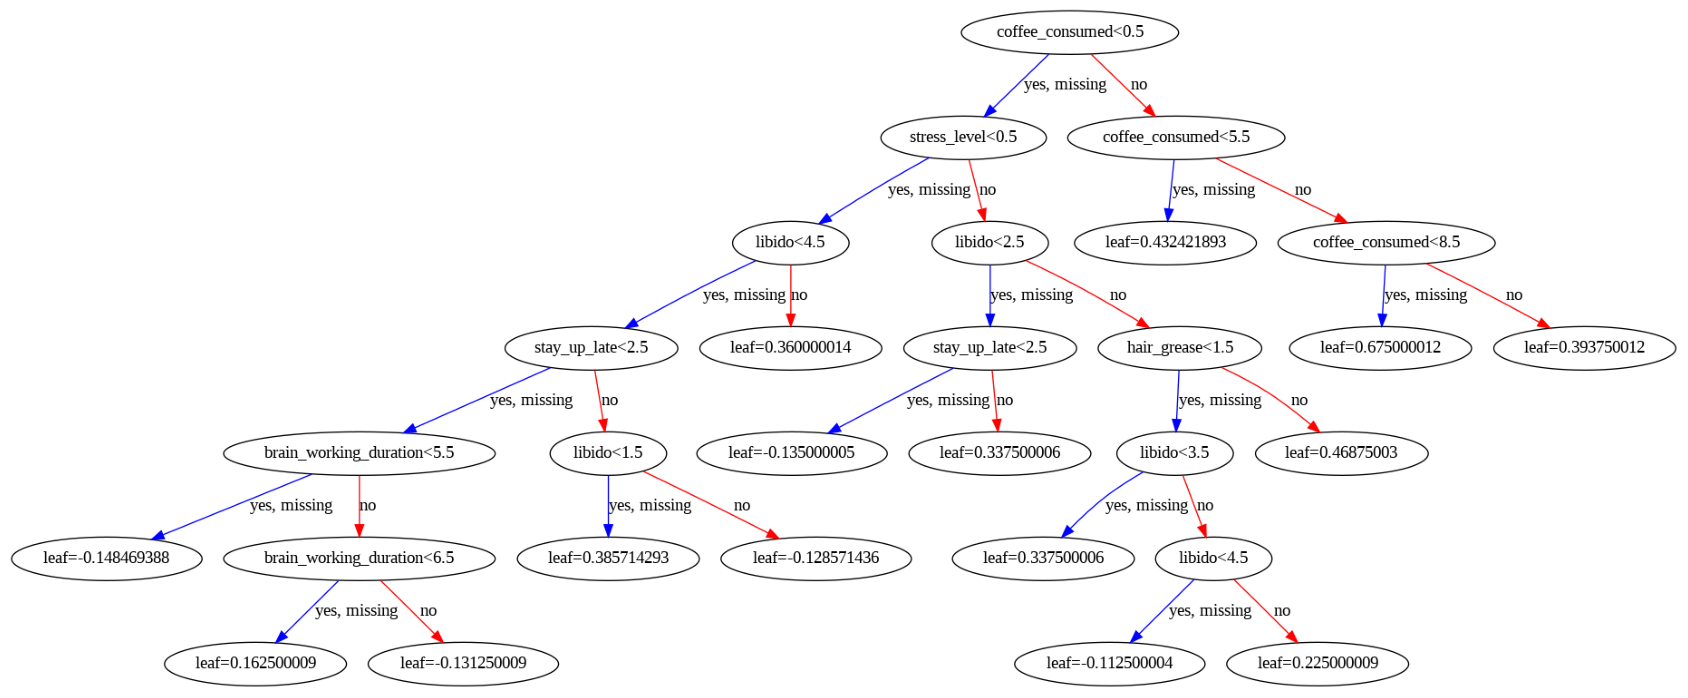

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 25))
xgb.plot_tree(xgb_model, ax=ax, num_trees=0)
plt.show()

XGBoost regression model is built to predict hair loss based on features like stress level, dandruff, coffee consumption, hair grease, pressure level, libido, brain working duration, stay up late and swimming.
<br>
<br>
First, the dataset is split into training and testing sets using train_test_split from sklearn.model_selection module. Then, an XGBoost regression model is defined using xgb.XGBRegressor with the objective of minimizing the squared error. The model is trained on the training set using the fit method.
<br>
<br>
Next, the trained model is used to make predictions on the testing set using the predict method. The performance of the model is evaluated using root mean squared error (RMSE), which is calculated using mean_squared_error
<br>
<br>
To interpret the nodes of the tree-based XGBoost model, I used the SHAP values approach . SHAP values can be calculated for each feature using shap.TreeExplainer on the trained XGBoost model and then visualized using various SHAP plots. This can help to understand how each feature contributes to the final prediction made by the model.

In [35]:
# Get numerical feature importances
tree_importances = list(xgb_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(X_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [36]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: coffee_consumed      Importance: 0.5799999833106995
Variable: dandruff             Importance: 0.15000000596046448
Variable: stress_level         Importance: 0.09000000357627869
Variable: libido               Importance: 0.07000000029802322
Variable: stay_up_late         Importance: 0.05000000074505806
Variable: hair_grease          Importance: 0.029999999329447746
Variable: brain_working_duration Importance: 0.029999999329447746
Variable: pressure_level       Importance: 0.009999999776482582
Variable: swimming             Importance: 0.0


**The variable importance we get from the tree-based regressor re-inforces our interpretation from the linear model.**




# **Using H2O AutoML to build best model** 

In [37]:
import logging
import h2o

# **Setting up maximum runtime for the AutoML**


In [38]:
min_mem_size = 6
run_time = 222

In [39]:
import psutil
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [40]:
import random, os, sys
port_no = random.randint(5555, 55555)
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:49378..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4q9bixwr
  JVM stdout: /tmp/tmp4q9bixwr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4q9bixwr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:49378
Connecting to H2O server at http://127.0.0.1:49378 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_hfn4de
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:49378
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

# **Converting Pandas dataframe in H2O dataframe**

In [41]:
df = h2o.H2OFrame(imputed_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
df.types

{'hair_loss': 'int',
 'stay_up_late': 'int',
 'pressure_level': 'int',
 'coffee_consumed': 'int',
 'brain_working_duration': 'int',
 'school_assesssment': 'enum',
 'stress_level': 'int',
 'shampoo_brand': 'enum',
 'swimming': 'int',
 'hair_washing': 'enum',
 'hair_grease': 'real',
 'dandruff': 'int',
 'libido': 'int'}

In [43]:
df.shape

(400, 13)

In [44]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [45]:
print(df_train.shape)
print(df_test.shape)

(318, 13)
(82, 13)


In [46]:
X=df.columns
print(X)

['hair_loss', 'stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'school_assesssment', 'stress_level', 'shampoo_brand', 'swimming', 'hair_washing', 'hair_grease', 'dandruff', 'libido']


In [47]:
#Seperate Dependent variable from Independent variable
y_numeric ='hair_loss'
X.remove(y_numeric) 
print(X)

['stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'school_assesssment', 'stress_level', 'shampoo_brand', 'swimming', 'hair_washing', 'hair_grease', 'dandruff', 'libido']


In [48]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "hair_loss"

    X.remove(y)  # Removing the result from our predictors data
    X.remove("swimming")  # Removing swimming from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train( x=X, y=y, training_frame=df_train )  # Training the dataset on different models

    return df_train, df_test, aml

In [53]:
# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [57]:
from h2o.automl import H2OAutoML
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [58]:
autoML[2].leaderboard

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
XGBoost_grid_1_AutoML_1_20230325_164356_model_3          0.337834  0.114132  0.153006  0.181855                  0.114132
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_164356  0.339252  0.115092  0.158812  0.180538                  0.115092
XGBoost_grid_1_AutoML_1_20230325_164356_model_45         0.352101  0.123975  0.162254  0.188575                  0.123975
GBM_grid_1_AutoML_1_20230325_164356_model_17             0.355377  0.126293  0.186489  0.192018                  0.126293
GBM_grid_1_AutoML_1_20230325_164356_model_12             0.355932  0.126687  0.163008  0.195205                  0.126687
XGBoost_grid_1_AutoML_1_20230325_164356_model_83         0.356635  0.127188  0.17676   0.193767                  0.127188
GBM_grid_1_AutoML_1_20230325_164356_model_76             0.358237  0.128334  0.173868  0.194198                  0.128334
XGBoost_grid_1_AutoML_1_20230325_164356_model_39         0.358376  0.128434  0.182313  0.193279                  0.128434
XGBoost_grid_1_AutoML_1_20230325_164356_model_91         0.359129  0.128974  0.163391  0.192294                  0.128974
XGBoost_grid_1_AutoML_1_20230325_164356_model_70         0.361247  0.1305    0.142324  0.191921                  0.1305
[211 rows x 6 columns]

In [59]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

0
Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20230325_164356_model_3


Model Summary: 
    number_of_trees
--  -----------------
    49

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.012166986866761344
RMSE: 0.11030406550422947
MAE: 0.04333318676213798
RMSLE: 0.043363008104123676
Mean Residual Deviance: 0.012166986866761344

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.1141315566174228
RMSE: 0.33783362268640876
MAE: 0.1530058500151964
RMSLE: 0.18185483302400537
Mean Residual Deviance: 0.1141315566174228

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.153141  0.0212817  0.147581      0.133748      0.135257      0.183707      0.16541
mean_residual_deviance  

# **SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

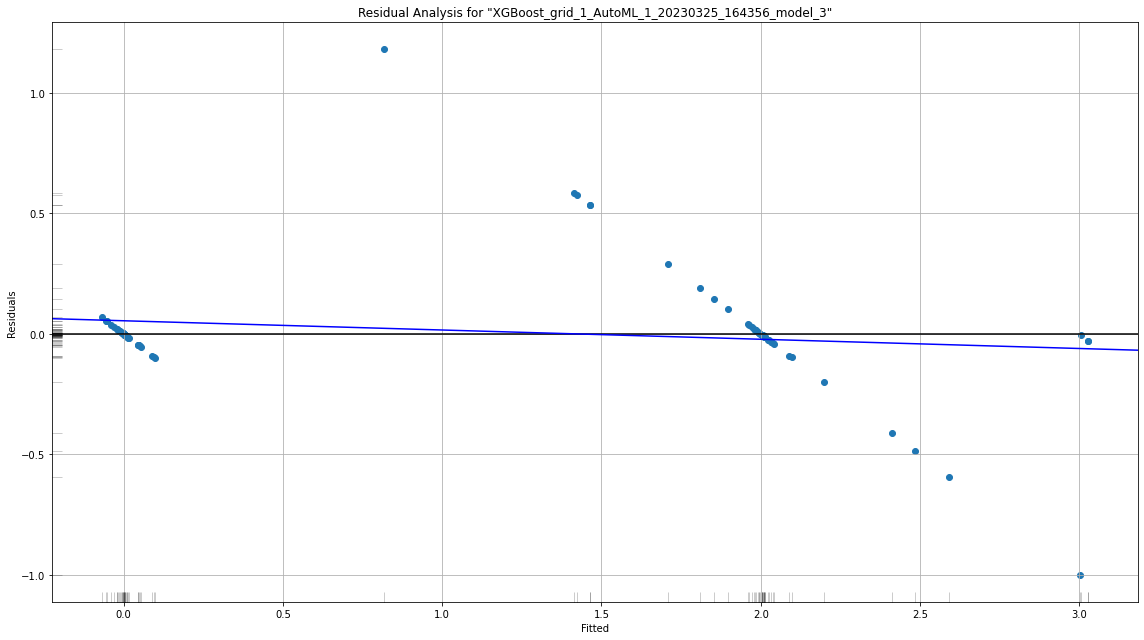

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

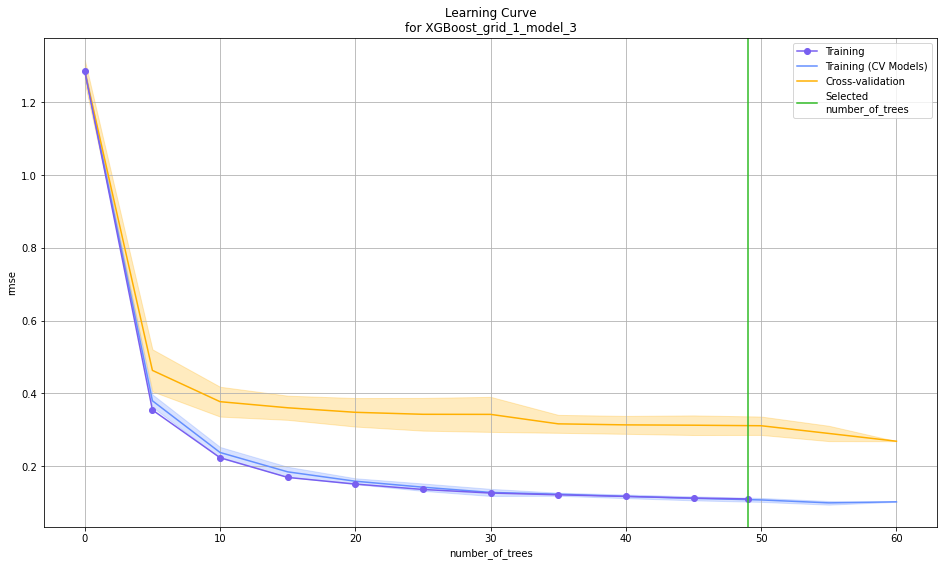

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

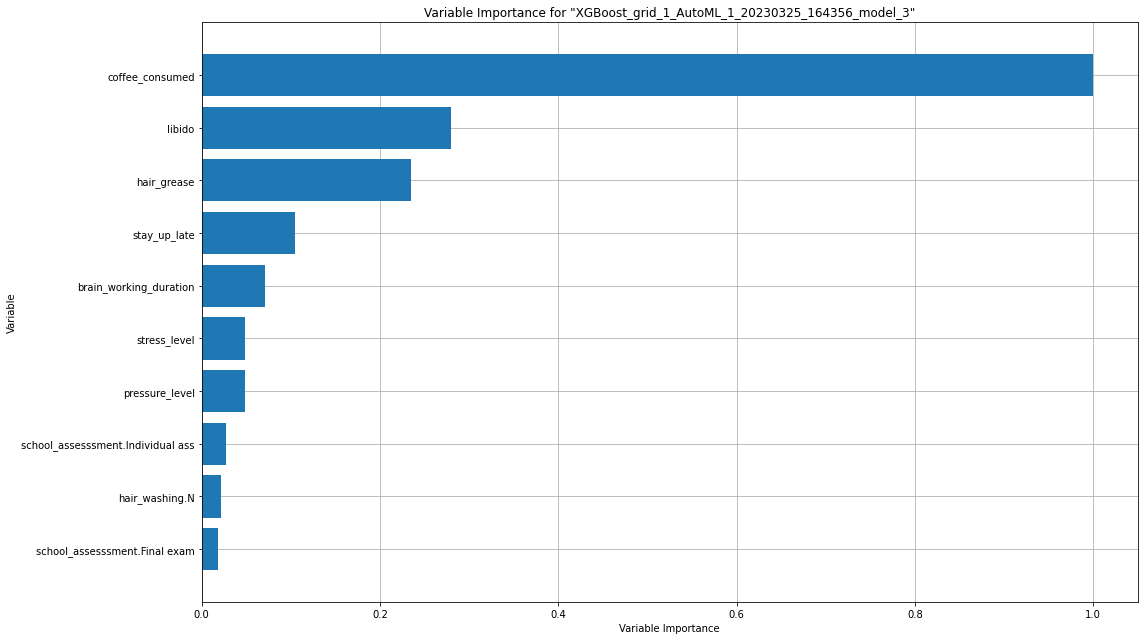

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

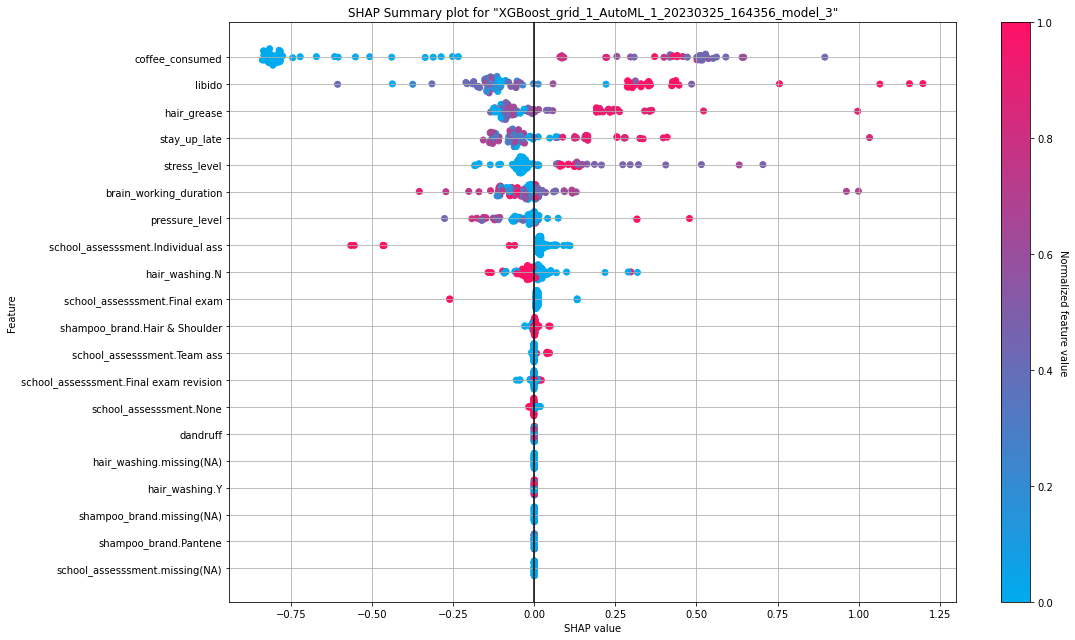

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

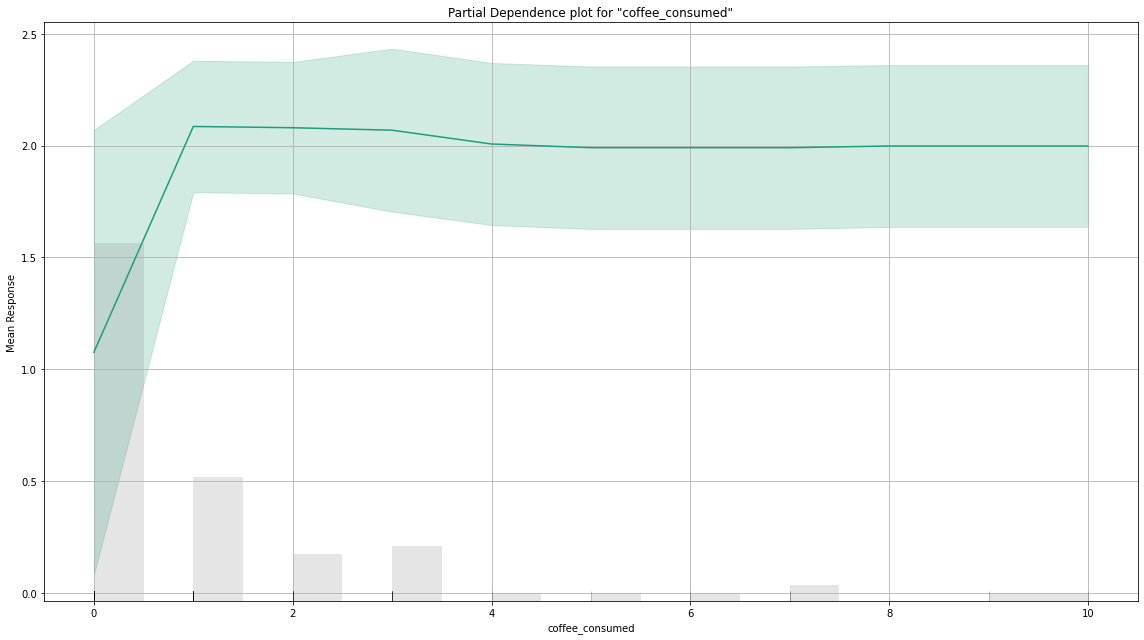

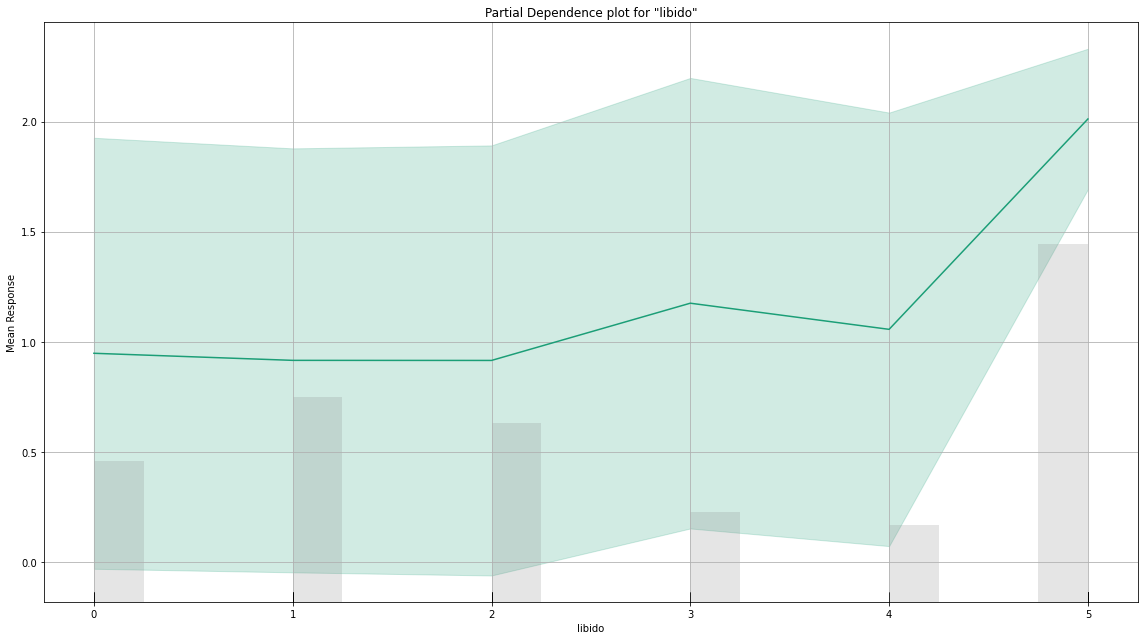

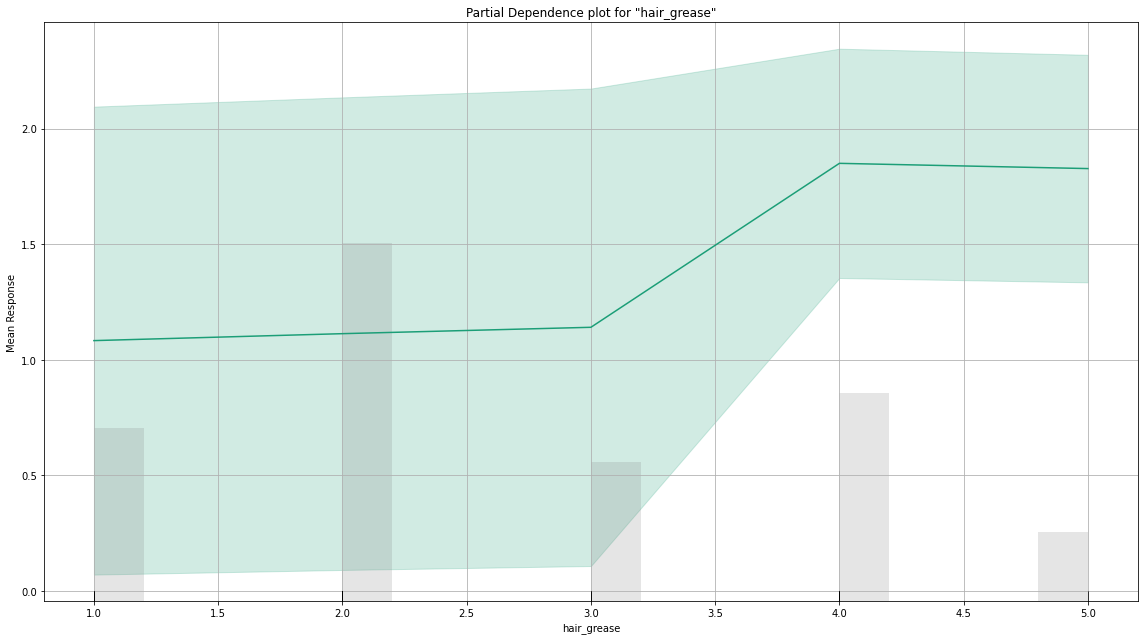

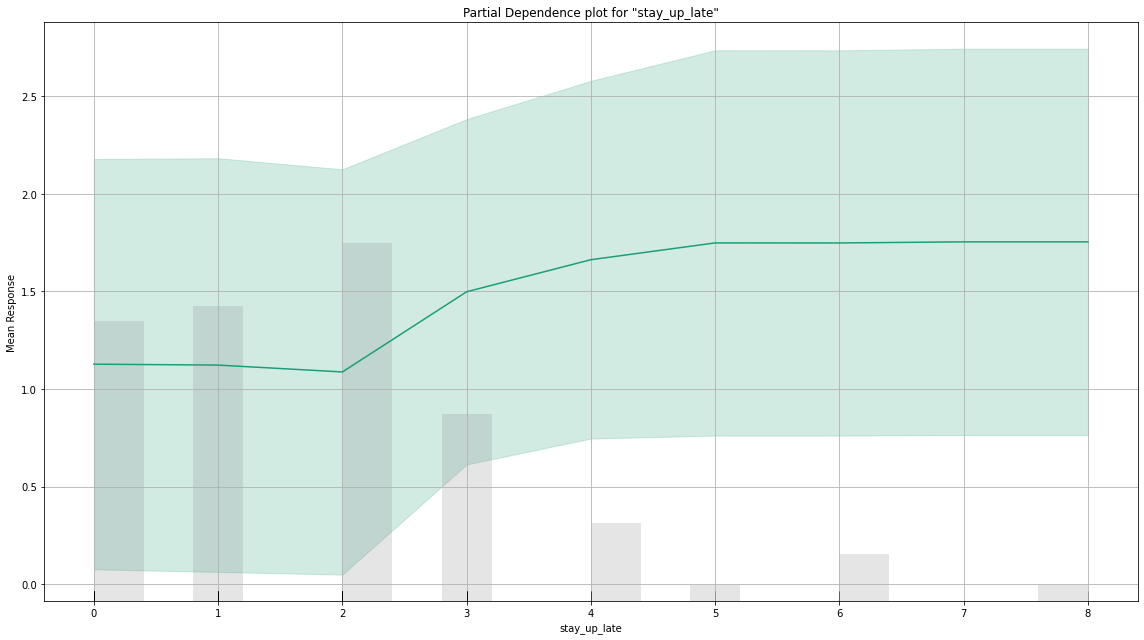

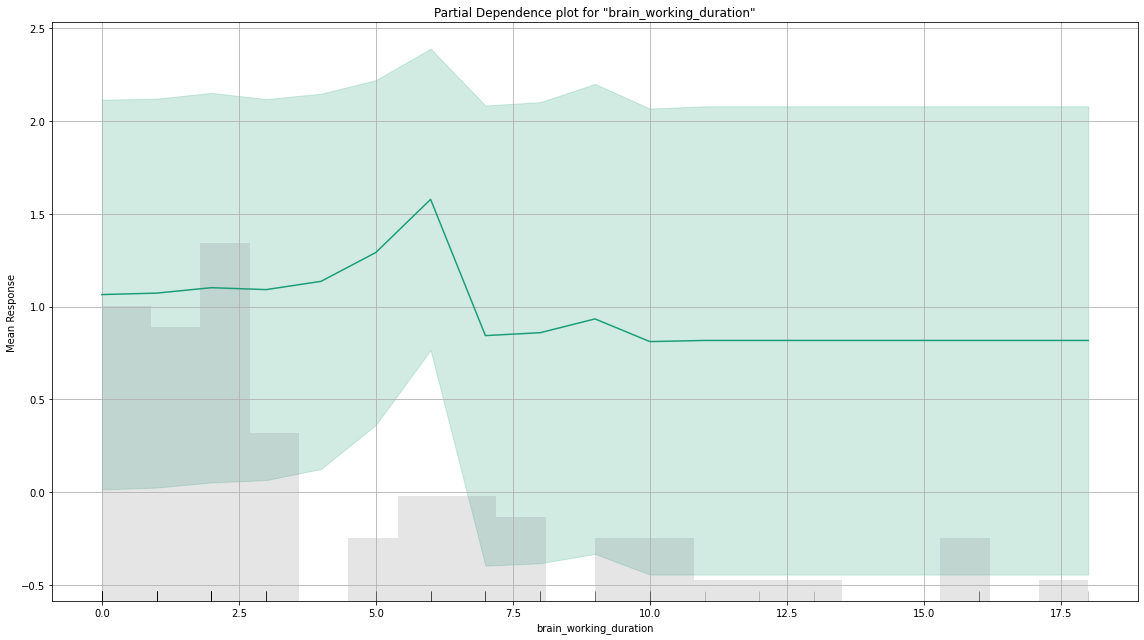

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

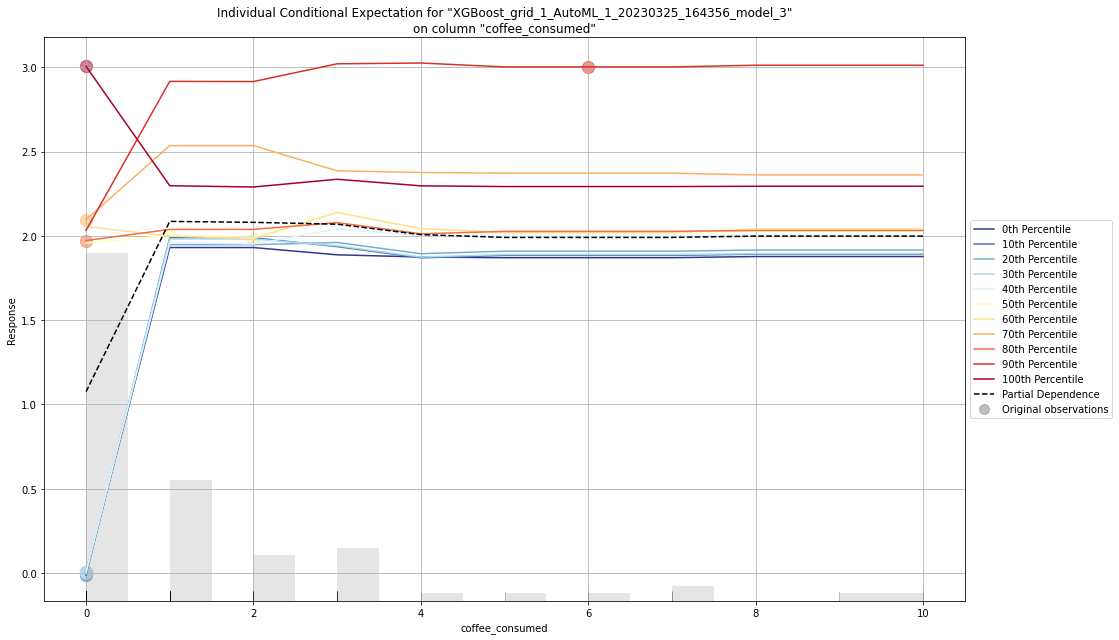

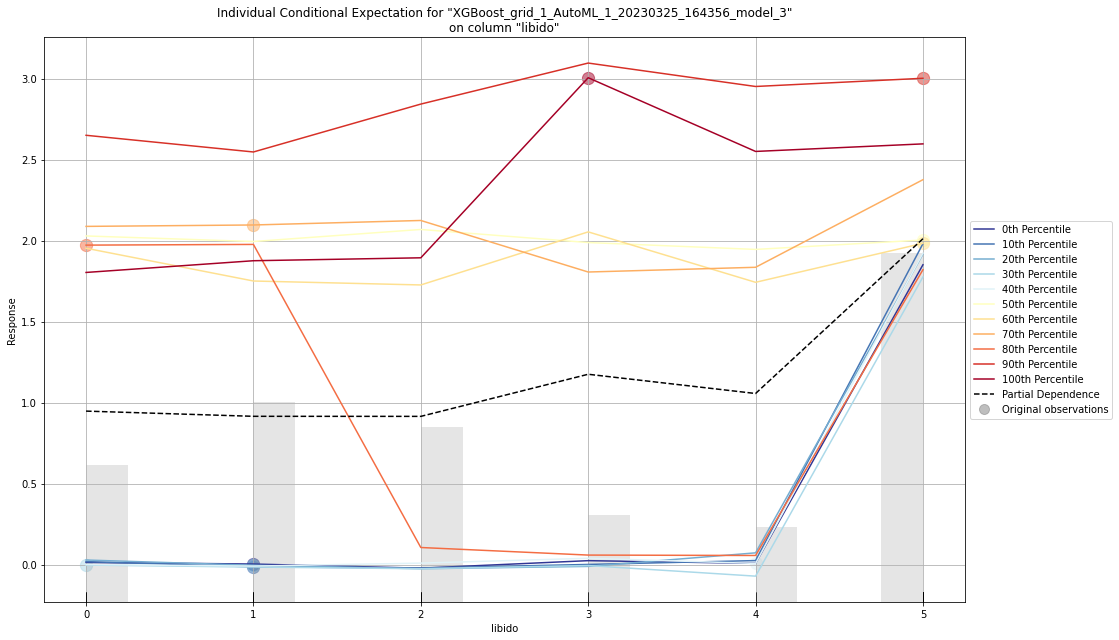

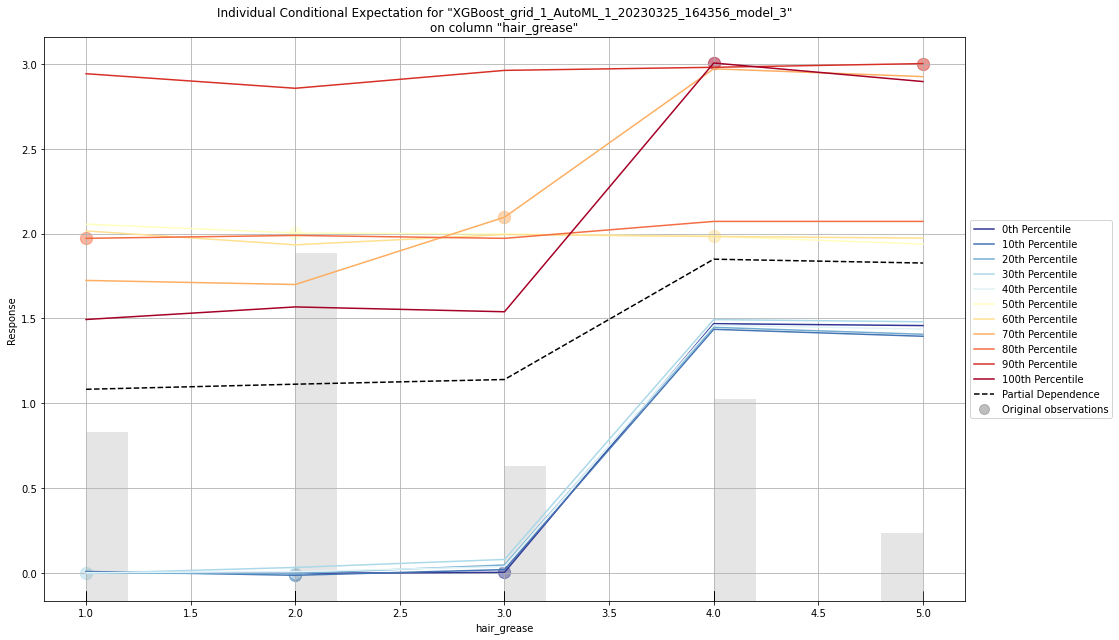

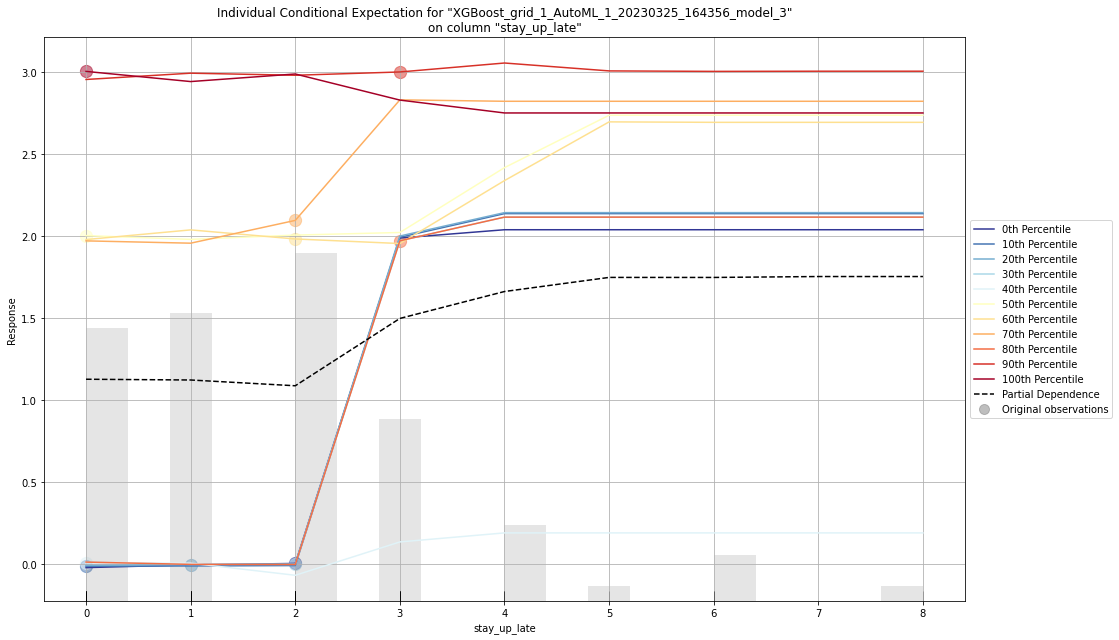

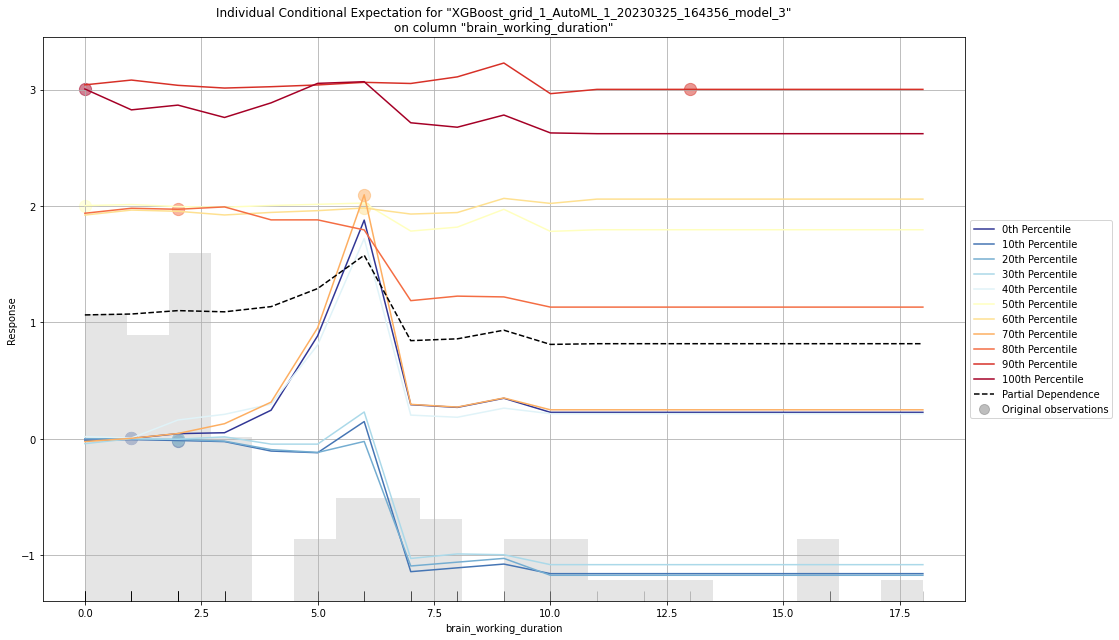

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [61]:
autoML_model.explain(autoML[1])

# **SHAP explanation for an Individual Person Hair Loss**
Analyzing the 10th hair loss in the dataset, please refer to the below cell for the Graph Y-axis has the features with its values from the 10th wine and X-axis has its corresponding SHAP values. This graph shows the contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying the inverse link function.

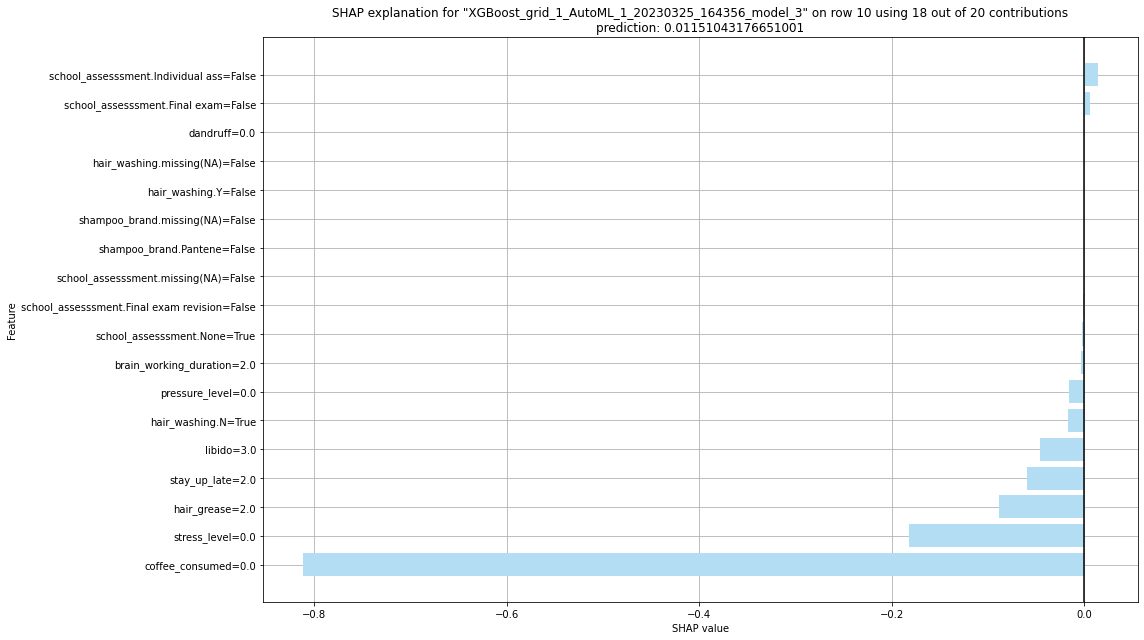

In [63]:
autoML_model.shap_explain_row_plot(
    autoML[1], 10
)  # Lets Analyze the 10th row in Test Data
     

# **SHAP Analysis for Linear and Tree-Based Models**
Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of stress_level

1. For the linear model the cross is made at approx E[f(x)] 1.3
2. For Tree-based model the cross is made at approx E[f(x)] 1.25
So as the stress_level increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 30) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [64]:
import shap

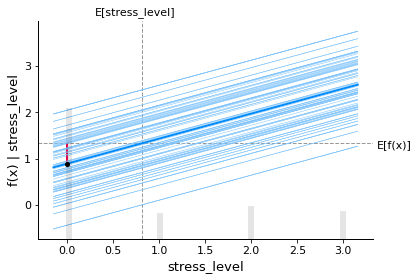

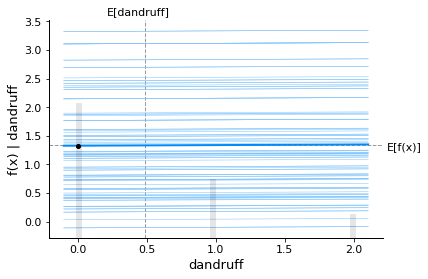

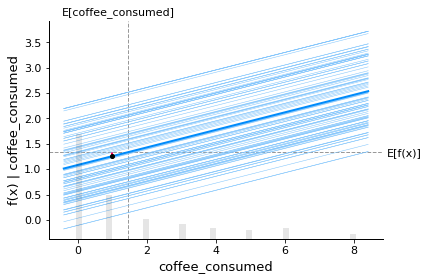

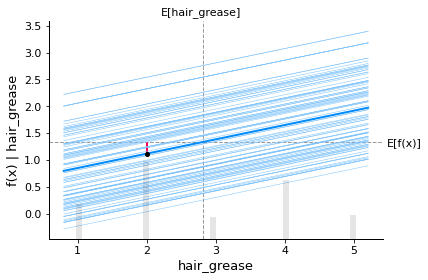

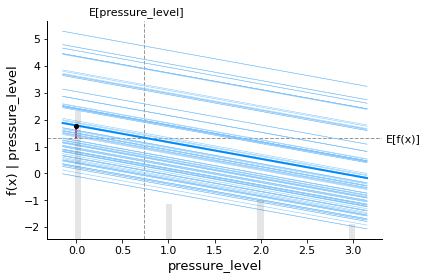

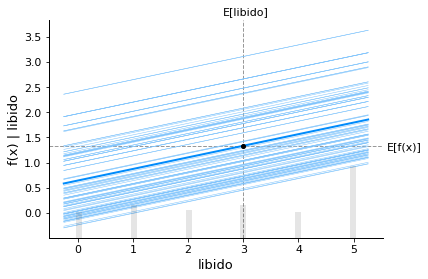

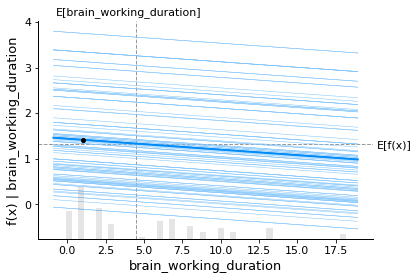

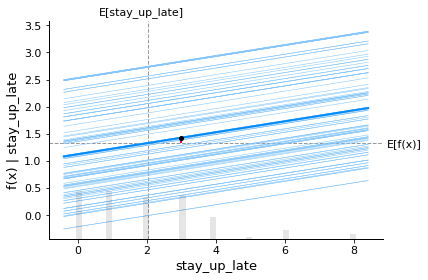

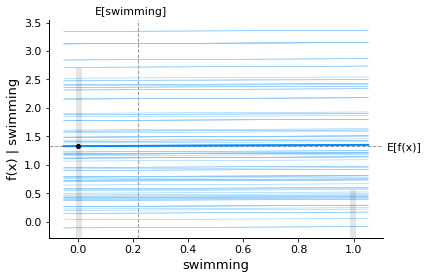

In [86]:
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(x_train_100)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 30
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=True,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

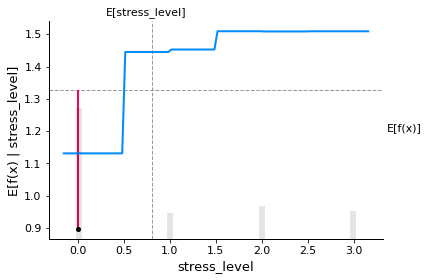

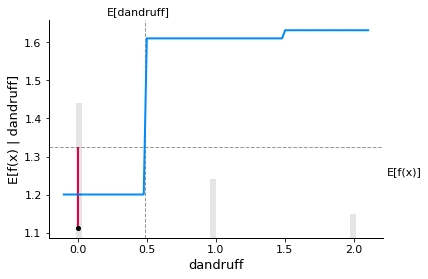

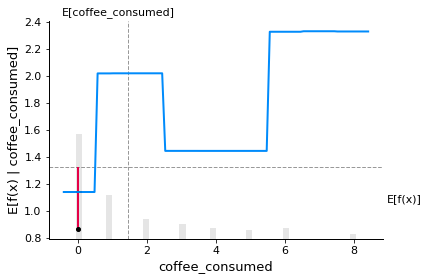

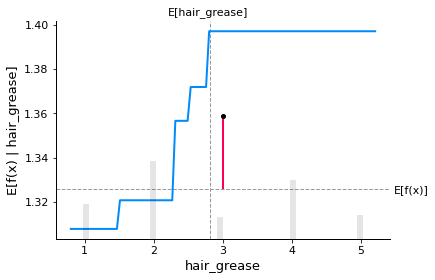

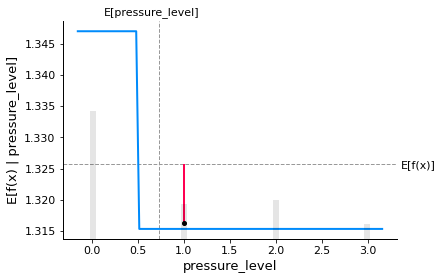

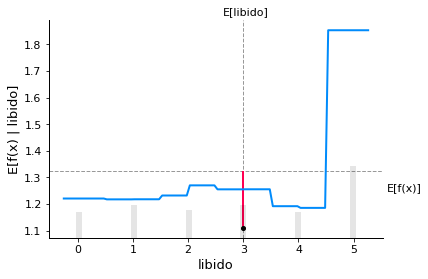

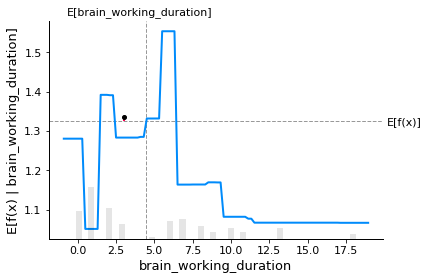

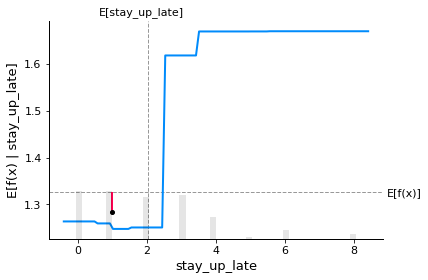

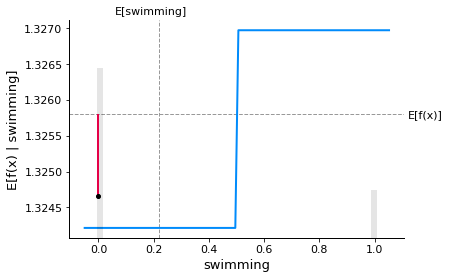

In [106]:
# SHAP explanation of a tree-based model
tree_explainer = shap.Explainer(xgb_model.predict, x_train_100)
tree_shap_values = tree_explainer(x_train_100)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        xgb_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

# **Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

The following plots are

1. SHAP feature importance for a linear model
2. SHAP feature importance for tree-based model
As we can see below in the plots, there is a difference in feature importance for both the models

For the linear model, pressure_level is the most important feature but for our tree-based model coffee_consumed is the most important feature when we consider the average of SHAP values to calculate feature importance.

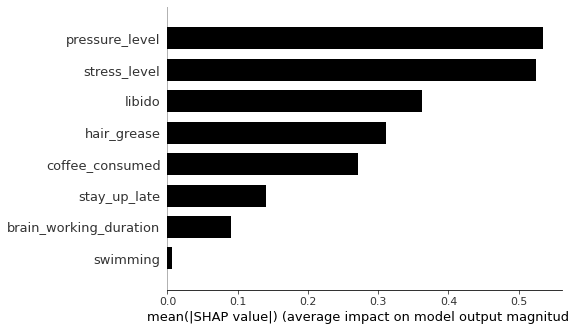

In [101]:
# SHAP variable importance for a Linear Model
plt.figure(figsize=(10, 6))
shap.summary_plot(linear_shap_values, x_train, title="Feature Importance Plot",plot_type="bar",max_display=8,sort="high-to-low", color="black")
plt.show()

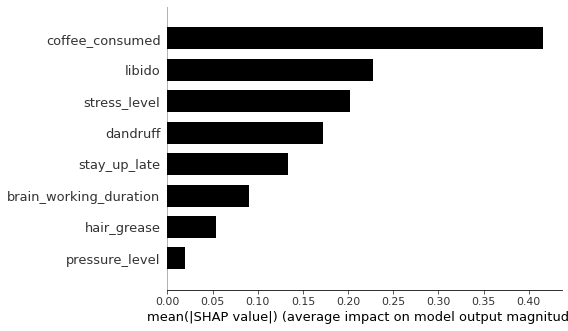

In [102]:
# SHAP variable importance for Tree based model
plt.figure(figsize=(10, 6))
shap.summary_plot(tree_shap_values, x_train, plot_type="bar",max_display=8,sort="high-to-low", color="black",title="Feature Importance Plot")
plt.show()

# **Interpreting Waterfall SHAP visualization**
1. Let's consider the same sample (sample_ind = 30)
It says that f(x) = 0.451 is what we got as a model output and the expected output for this sample was 1.333. We came close to determining it as the difference is only 0.87. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that stress_level has the  most negative impact in decreasing the level of hair_loss by 0.44 for this specific sample. Followed by coffee_consumed had a negative impact and it bought the level of hair_loss down again by 0.25 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 0.451.

2. Similarly we can interpret the tree-based model for the same sample.
Where the output we got was 0 and the expected output was 1.326. in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model. Here in the tree-based model, the output is majorly determined by only three features - stress_level, coffee_consumed, libido and dandruff, whereas in the linear model stress_level, coffee_consumed, pressure_level, stay_up_late,hair_grease these features had maximum impact.

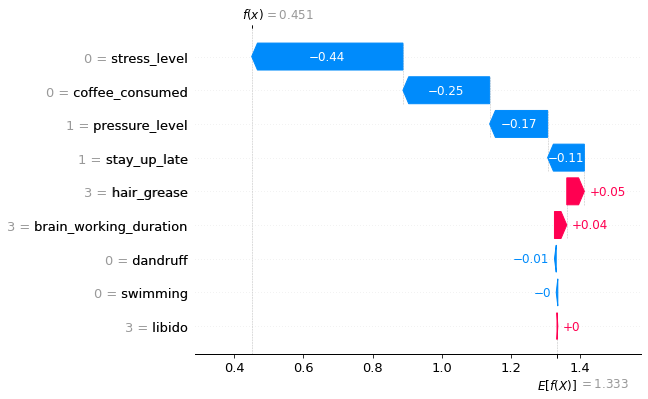

In [69]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)


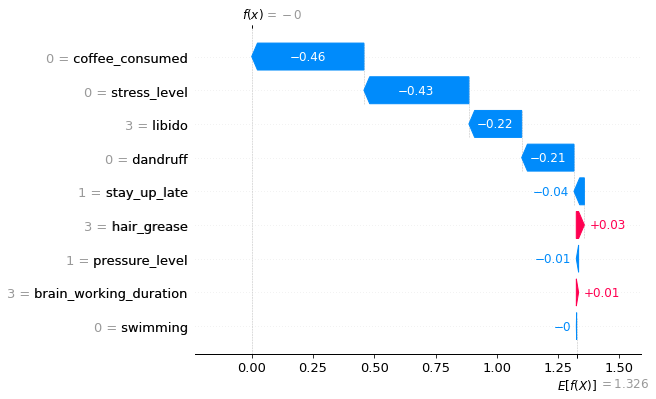

In [70]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

# **Interpret the summary plot for the Linear and Tree-based model**

The feature importance plot shows the descending order of features based on their impact on the target variable. The impact of each feature is represented by a dot on the plot, where the red color indicates high values and the blue color indicates low values. If a dot lies to the right of the y-axis, it signifies a positive impact, whereas a dot on the left side of the axis represents a negative impact of the feature on the target variable.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


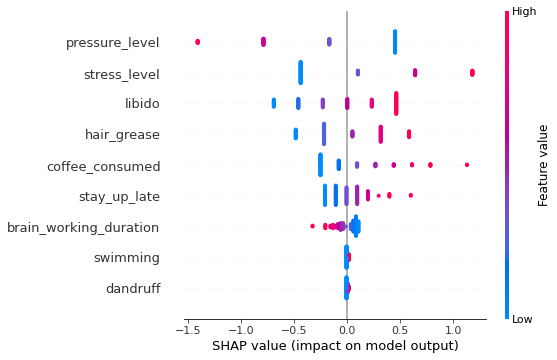

In [71]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train_100)

Let us try to understand how both models are performing side by side

Higher value of libido tends to have a positive impact on the hair_loss
Higher values of coffee_consumed tend to have a positive impact on the hair_loss.
Lower values of pressure_level tends to have a positive impact on the hair_loss
Lower value of pressure_level tends to have a positive impact on the quality of wine, and so on.


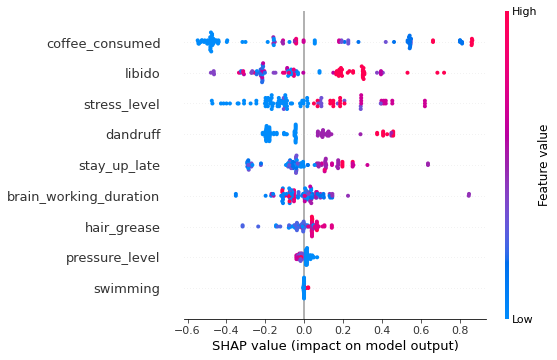

In [72]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train_100)

# **Interpreting SHAP dependence plot** 
The SHAP dependence plot illustrates the impact of one or two features on the predicted outcome of a machine learning model. It helps determine the nature of the relationship between the target and a feature.

In the linear model SHAP dependence plot, there is a linear relationship between the feature and its SHAP value. If a feature positively affects hair_loss, the relationship is directly proportional (e.g. coffee_consumed and pressure_level), and if a feature negatively affects hair_loss, the relationship is inversely proportional (e.g. pressure_level and stay_up_late).

Example of SHAP dependence plot of stress_level

1. The SHAP dependence plot shows a linear relationship between the stress_level feature and its SHAP values in the linear model. The direction of the relationship, whether it is direct or inverse, can also be determined from the plot.
2. The tree-based model allows us to understand the impact of each feature on hair_loss through tuning, and confirms the conclusions drawn from the PDP and ICE plots.


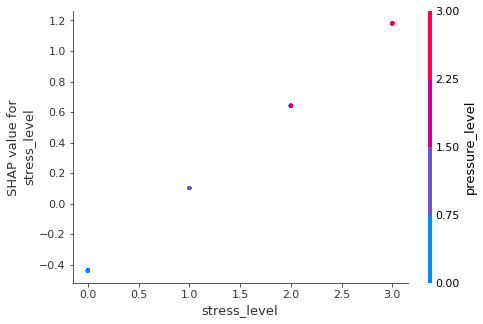

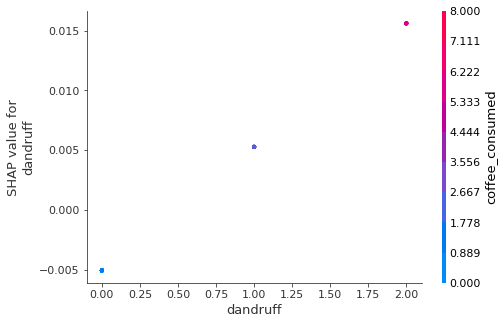

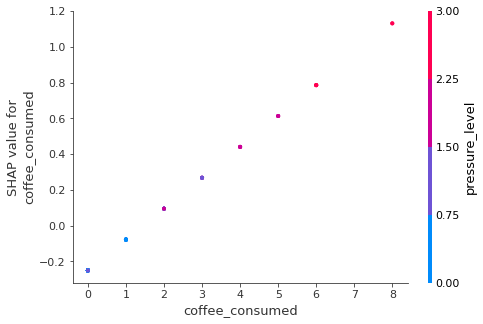

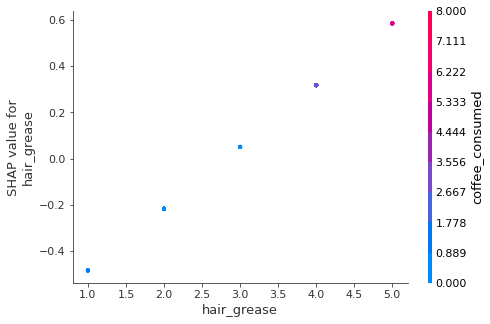

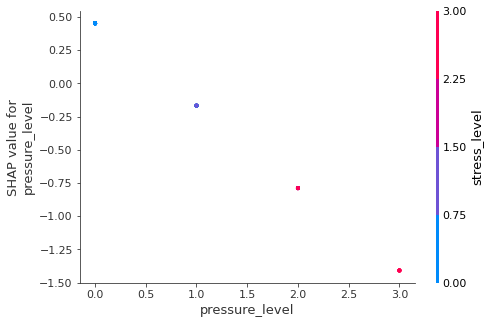

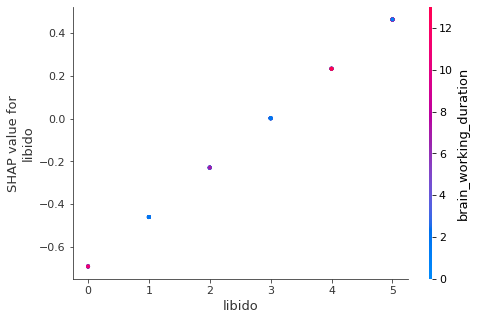

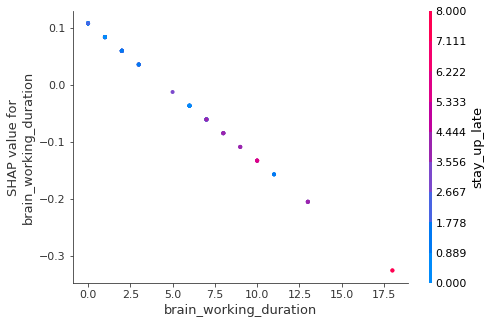

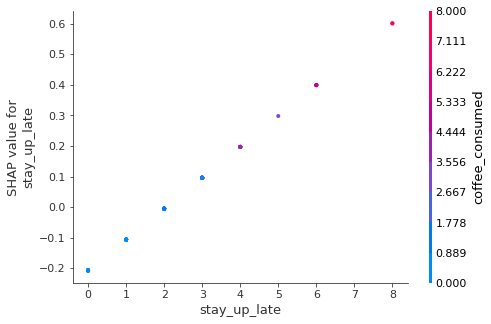

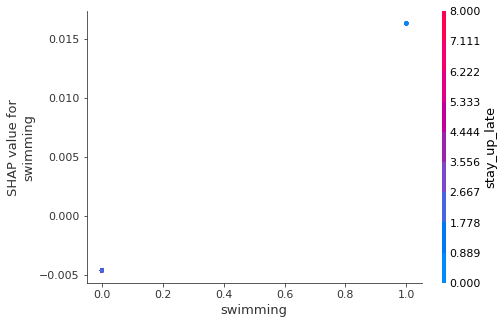

In [73]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train_100)

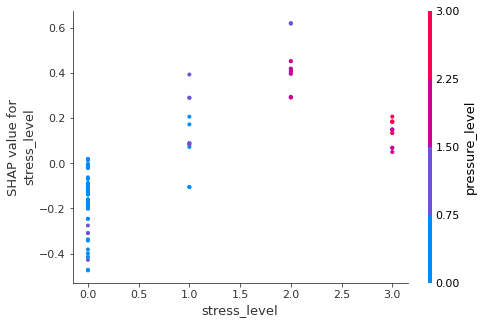

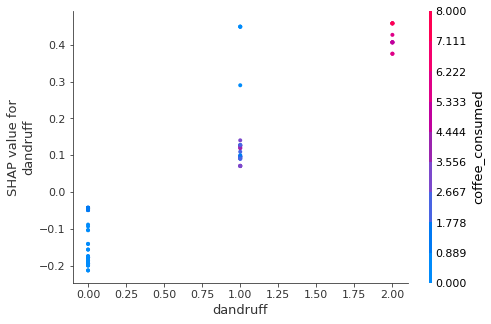

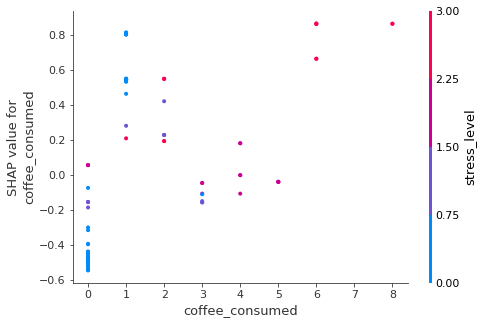

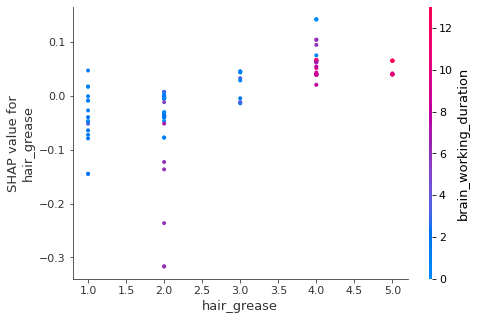

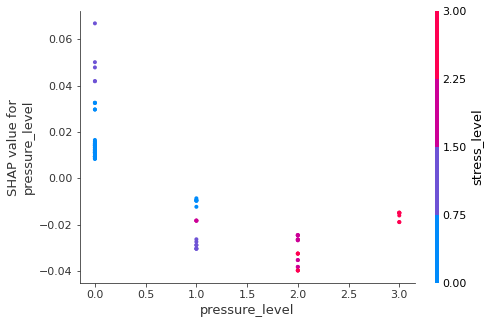

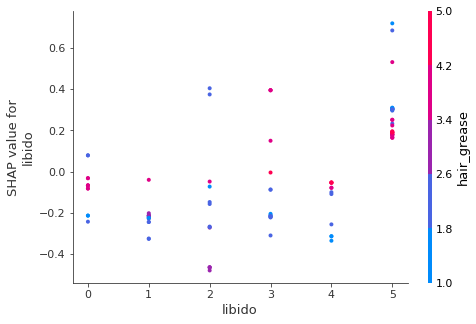

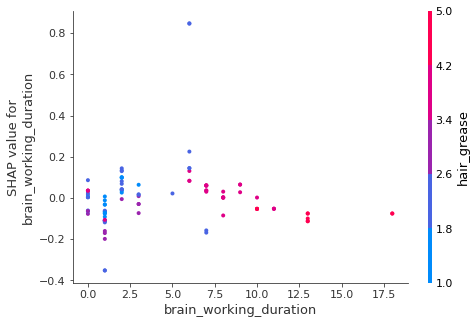

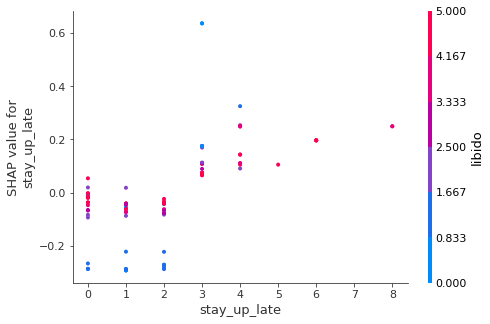

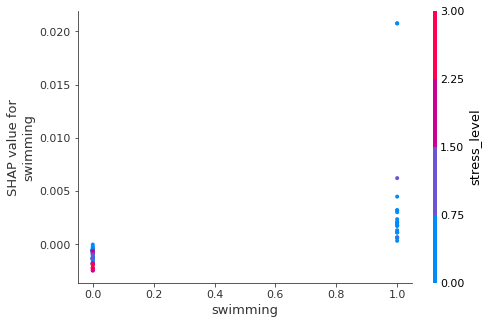

In [74]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train_100)
     

In [75]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    xgb_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

# **Heatmap Visualization**
1. This visualization provides a summary of how each data point in every feature is impacting the target variable, hair_loss. The Y-axis represents the features, while the X-axis represents instances of that feature. 
2. The color of the instance represents whether it has a positive or negative effect, with red indicating a positive effect and blue indicating a negative effect. 
3. The intensity of the color corresponds to the intensity of the effect, with deeper colors indicating a more impactful feature.

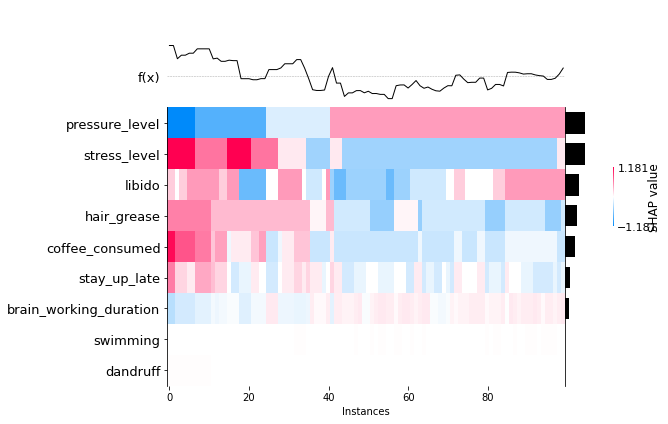

In [76]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

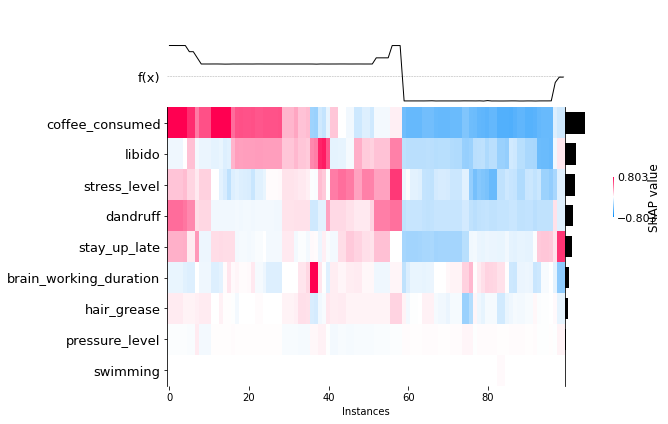

In [77]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

# **LIME (Local Interpretation Model-Agnostic Explanation) Analysis**
LIME creates a simpler model (e.g. linear) to interpret a more complex model (e.g. tree-based) at specific data points. It approximates the simple model to the whole model. LIME is effective on various types of datasets such as tabular, text, and image.

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 30) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models

1. As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. The Color orange here represents positive and blue represents negative
2. Here for this sample as seen below stress_level,coffee_consumed,hair_grease etc had a positive effect on the hair_loss in both models
pressure_level,libido,brain_working_duration, had a negative effect in the linear model but positive in tree-based model
3. These interpretations were carried out locally in the region where of out sample data(sample_index = 30).

In [78]:
# Initializing LIME explainer for Linear Model
from lime import lime_tabular

lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [79]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [2.3153839]
Actual :      2


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [80]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook


In [81]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [82]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", xgb_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], xgb_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [2.001352]
Actual :      2


In [83]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook


# **Comparison between SHAP and LIME Analysis**
Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.

# **References**
1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb
2. SHAP (SHapley Additive exPlanations) documentation: https://shap.readthedocs.io/en/latest/
3. Christoph Molnar's "Interpretable Machine Learning" book, Chapter 5: https://christophm.github.io/interpretable-ml-book/shapley.html
4. “An Introduction to SHAP (SHapley Additive exPlanations) Values in Python”, by Will Koehrsen (2019): https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
5. “Interpretable Machine Learning with XGBoost”, by Ando Saabas (2016): https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

# **LICENSE**

MIT License

Copyright (c) 2023 Poornachandra Kongara



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

<br>

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

<br>



THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.